In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\amits\Downloads\Algerian_forest_fires_dataset_UPDATE.csv", header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.shape

(246, 14)

# Data Cleaning

In [5]:
# Missing Value
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df.loc[:122,"Region"]=0
df.loc[122:, "Region"]=1

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [11]:
df["Region"].unique()

array([0., 1.])

In [12]:
df[["Region"]]=df[["Region"]].astype(int)

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [14]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [15]:
# Removing the null value
df=df.dropna().reset_index(drop=True)

In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
df.drop(122, axis=0, inplace=True)

In [19]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [20]:
# df.drop(columns=["day","month","year"], inplace=True)

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [22]:
# Fix spaces in column names
df.columns=df.columns.str.strip()

In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [24]:
# change the required columns as integer data type

In [25]:
df[["day","month","year",'Temperature', 'RH', 'Ws']]=df[["day","month","year",'Temperature', 'RH', 'Ws']].astype(int)

In [26]:
# Changing the other columns to float datatype

In [27]:
obj=[i for i in df.columns if df[i].dtypes=="O"]
obj

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [28]:
for i in obj:
    if i!="Classes":
        df[i]=df[i].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 23.7+ KB


In [30]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [31]:
# Saving the cleaned dataset

In [32]:
df.to_csv("Algerian_forest_fires_dataset_cleaned.csv", index=False)

# EDA

In [33]:
df_=df.drop(['day',	'month','year'], axis=1) 

In [34]:
df_.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [35]:
df_['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [36]:
df_['Classes']=np.where(df_["Classes"].str.contains("not fire"),0,1)

In [37]:
df_.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [38]:
df_['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

C:\Users\amits\AppData\Local\Temp/ipykernel_9392/2256120072.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


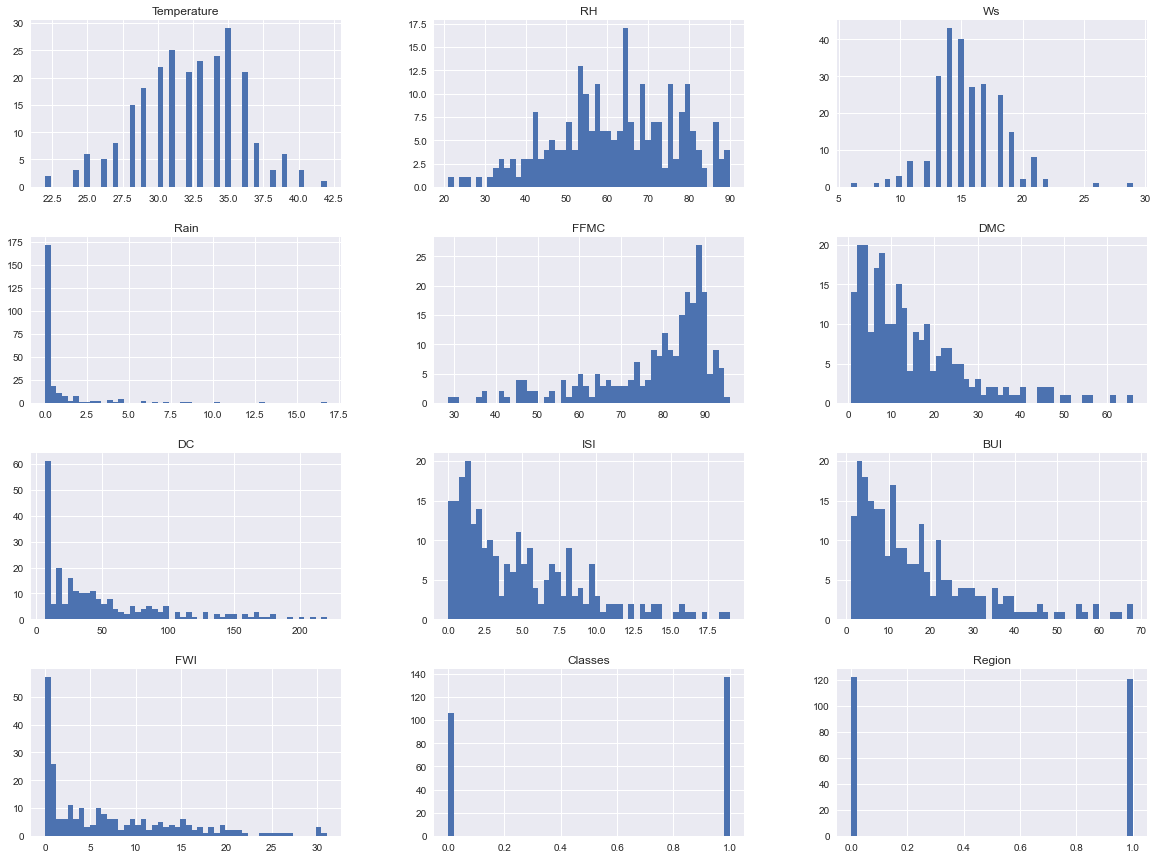

In [39]:
# Plotting density plot for all features
plt.style.use("seaborn")
df_.hist(bins=50, figsize=(20,15))
plt.show()

In [40]:
# Percentage for pie chart
per=df_['Classes'].value_counts(normalize=True)*100
per

1    56.378601
0    43.621399
Name: Classes, dtype: float64

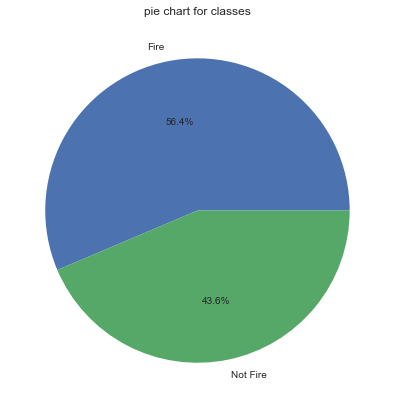

In [41]:
# Plotting Pie-Chart
classlabels=['Fire', 'Not Fire']
plt.figure(figsize=(12,7))
plt.pie(per, labels=classlabels, autopct="%1.1f%%")
plt.title("pie chart for classes")
plt.show()

In [42]:
# Correlation
corr=df_.corr()
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

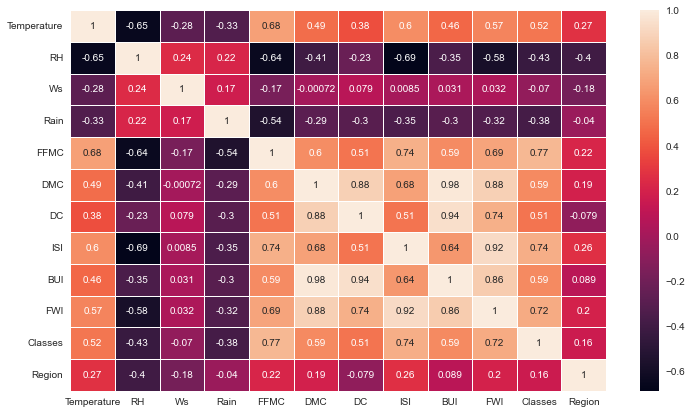

In [43]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, linewidth=0.5)

C:\Users\amits\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='FWI'>

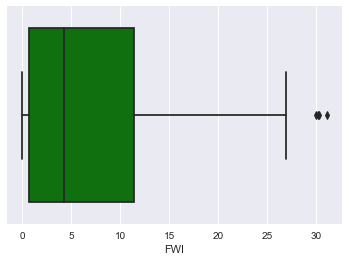

In [44]:
sns.boxplot(df["FWI"], color="green" )

In [45]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [46]:
df['Classes']=np.where(df["Classes"].str.contains("not fire"),0,1)

Text(0.5, 1.0, 'Fire Analysis of bejaia Regions')

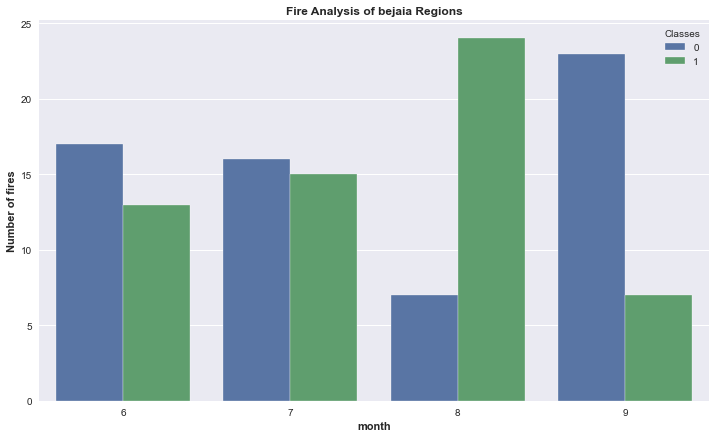

In [47]:
# Monthly Fire Analysis
dftemp=df.loc[df["Region"]==0]
plt.subplots(figsize=(12,7))
sns.set_style("whitegrid")
sns.countplot(x='month', hue="Classes", data=dftemp)
plt.ylabel("Number of fires", weight="bold")
plt.xlabel("month", weight="bold")
plt.title("Fire Analysis of bejaia Regions", weight="bold")

Text(0.5, 1.0, 'Fire Analysis of sidi- bel Regions')

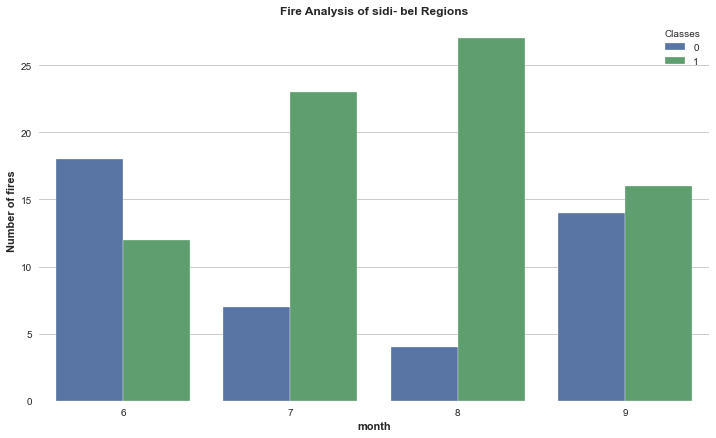

In [48]:
dftemp=df.loc[df["Region"]==1]
plt.subplots(figsize=(12,7))
sns.set_style("whitegrid")
sns.countplot(x='month', hue="Classes", data=dftemp)
plt.ylabel("Number of fires", weight="bold")
plt.xlabel("month", weight="bold")
plt.title("Fire Analysis of sidi- bel Regions", weight="bold")

In [49]:
df=pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")

In [50]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [51]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [52]:
df.drop(['day', 'month', 'year'],inplace=True, axis=1)

In [53]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [54]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [55]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [56]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [57]:
# Training our model

In [58]:
x=df.drop("FWI", axis=1)

In [59]:
y=df['FWI']

In [60]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [61]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=0, test_size=0.25)

In [63]:
corr=x_train.corr()
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.512299,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.446906,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.108246,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.393221,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.773444,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.629505,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.562431,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.747764,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.624037,0.079373
Classes,0.512299,-0.446906,-0.108246,-0.393221,0.773444,0.629505,0.562431,0.747764,0.624037,1.000000,0.201988


<Axes: >

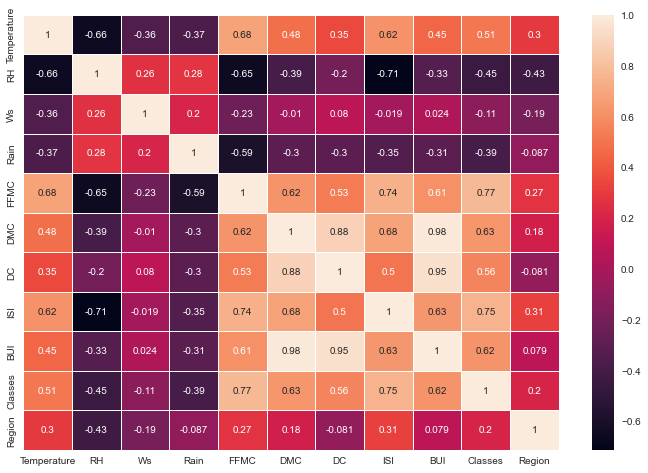

In [64]:
# Checking for multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, linewidth=0.5)

In [65]:
def correlation(dataset, threshold):
    col_corr= set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [66]:
# threshold-- domain expertise
correlation(x_train, 0.85)

{'BUI', 'DC'}

In [67]:
# Dropping Features when correlation is more than 0.85
x_train.drop(['BUI', 'DC'], axis=1, inplace=True)
x_test.drop(['BUI', 'DC'], axis=1, inplace=True)

In [68]:
# Feature Scaling and Standardization
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()

In [70]:
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [71]:
x_train_scaled

array([[ 1.01365171, -1.8394432 , -0.88892151, ...,  0.89709937,
         0.88561489,  1.02222494],
       [ 0.47735924,  0.64088224, -0.54024971, ..., -0.91779112,
        -1.12915898,  1.02222494],
       [ 1.81809043, -1.8394432 ,  0.50576569, ...,  2.75736213,
         0.88561489,  1.02222494],
       ...,
       [-0.32707948, -0.46873704, -1.58626511, ..., -0.57749915,
        -1.12915898, -0.97825827],
       [-0.32707948,  0.44506707, -0.54024971, ..., -0.1010904 ,
         0.88561489, -0.97825827],
       [-0.05893324, -0.86036737,  0.85443749, ...,  1.84991688,
         0.88561489,  1.02222494]])

In [72]:
# Box Plots to understand effect of standard scaler

C:\Users\amits\AppData\Local\Temp/ipykernel_9392/663030242.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train after Scaling')

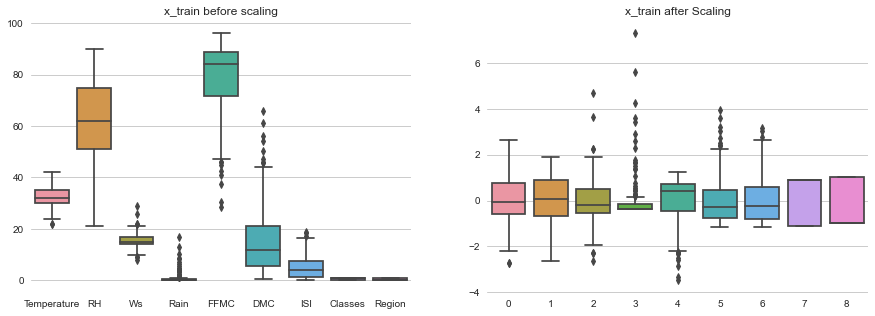

In [73]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("x_train after Scaling")

# Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred=lr.predict(x_test_scaled)

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("mean squared error", mse)
print("r2 score: ", r2)
print("mean absolute error:", mae)

mean squared error 1.0276388653779163
r2 score:  0.9703973266545679
mean absolute error: 0.6852784521674966


C:\Users\amits\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amits\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


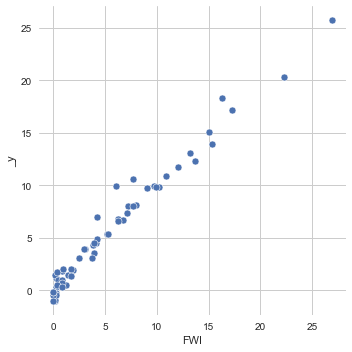

In [76]:
 sns.relplot(y_test, y_pred, kind="scatter")

# Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred=lasso.predict(x_test_scaled)

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("mean squared error", mse)
print("r2 score: ", r2)
print("mean absolute error:", mae)

mean squared error 2.164064960096106
r2 score:  0.9376608745831527
mean absolute error: 1.1209175798372668


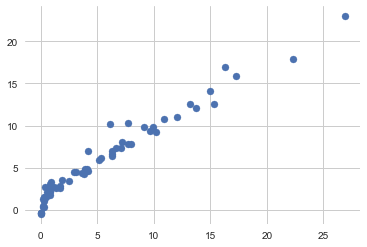

In [79]:
plt.scatter(y_test, y_pred)

# Ridege Regression Model

In [81]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred=ridge.predict(x_test_scaled)

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("mean squared error", mse)
print("r2 score: ", r2) 
print("mean absolute error:", mae)

mean squared error 1.0690262143940819
r2 score:  0.9692051022118806
mean absolute error: 0.712626840057823


# Elasticnet Regression

In [83]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train_scaled, y_train)
y_pred=en.predict(x_test_scaled)

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("mean squared error", mse)
print("r2 score: ", r2) 
print("mean absolute error:", mae)

mean squared error 4.944985881534331
r2 score:  0.8575522912954434
mean absolute error: 1.8193555979007134


# Cross Validation Lasso

In [89]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled, y_train)

LassoCV(cv=5)

In [90]:
lassocv.predict(x_test_scaled)

array([ 9.90822957,  7.86738037,  8.14768344,  6.6749599 ,  8.01513401,
       11.80882594, -1.00304813,  9.84269848,  5.32435868, 12.42111558,
        0.85336887, 13.08106744,  6.67897492, 15.01408761,  0.57111849,
        0.23671475,  1.87238406,  2.04379086,  3.73891922,  1.11937474,
       10.55723312,  5.47221646,  7.02171162, -0.87394028,  3.03546152,
        4.16052372,  9.84779146, -0.19379175,  1.23870294,  1.63316355,
       13.8221988 ,  0.95356565, -0.44588417, 20.23035045,  4.54689889,
        1.06722128,  0.85997919, 18.37655075, 25.54724054,  2.06158545,
        6.79411745,  0.60550947, -0.70723843,  1.55427274,  0.46029995,
       -0.40665142,  4.71525912,  7.40591065, -1.19342139, 10.0236032 ,
        4.57226006,  9.92015239, -0.40360642,  2.05989781,  6.72891822,
        1.6137917 , 10.95015094,  3.77922351,  3.89588672, 17.13275109,
        3.29846188])

In [95]:
lassocv.alpha_

0.025166943608269078

In [94]:
lassocv.alphas_

array([7.16763581, 6.68456115, 6.2340441 , 5.81389039, 5.42205364,
       5.05662537, 4.71582574, 4.39799487, 4.10158474, 3.82515165,
       3.56734923, 3.32692183, 3.10269844, 2.89358695, 2.69856887,
       2.51669436, 2.34707758, 2.18889241, 2.04136839, 1.90378699,
       1.77547812, 1.65581684, 1.54422032, 1.44014504, 1.34308409,
       1.25256471, 1.16814604, 1.08941691, 1.01599386, 0.94751927,
       0.88365964, 0.82410394, 0.76856209, 0.71676358, 0.66845611,
       0.62340441, 0.58138904, 0.54220536, 0.50566254, 0.47158257,
       0.43979949, 0.41015847, 0.38251517, 0.35673492, 0.33269218,
       0.31026984, 0.28935869, 0.26985689, 0.25166944, 0.23470776,
       0.21888924, 0.20413684, 0.1903787 , 0.17754781, 0.16558168,
       0.15442203, 0.1440145 , 0.13430841, 0.12525647, 0.1168146 ,
       0.10894169, 0.10159939, 0.09475193, 0.08836596, 0.08241039,
       0.07685621, 0.07167636, 0.06684561, 0.06234044, 0.0581389 ,
       0.05422054, 0.05056625, 0.04715826, 0.04397995, 0.04101

In [97]:
lassocv.mse_path_

array([[71.93873449, 42.85246783, 65.39195434, 48.29045179, 76.87755703],
       [68.28495462, 37.80622919, 59.52588047, 44.40188659, 74.12619007],
       [61.24278042, 32.97160105, 54.3351212 , 39.04586154, 66.34684563],
       [54.30034826, 28.76962133, 49.73769743, 33.5901418 , 59.56098931],
       [47.86283402, 25.1175118 , 45.66190475, 28.92526315, 52.508325  ],
       [42.23811385, 21.94373261, 42.04500242, 24.94287365, 46.07492343],
       [37.32192069, 19.18567899, 37.05309492, 21.54903147, 40.47095689],
       [33.02332033, 16.78904468, 32.57256075, 18.66244311, 35.5884093 ],
       [29.26392665, 14.70660751, 28.66325191, 16.21249476, 31.33459323],
       [25.97465105, 12.89718486, 25.25166236, 14.13830229, 27.62775878],
       [23.09557745, 11.32533521, 22.27373686, 12.38710529, 24.39713811],
       [20.57450524,  9.95986948, 19.67371132, 10.91329882, 21.58114908],
       [18.36595018,  8.77379473, 17.40239386,  9.67736508, 19.12590564],
       [16.42997436,  7.74364148, 15.4

In [102]:
y_pred=lassocv.predict(x_test_scaled)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("mean squared error", mse)
print("r2 score: ", r2) 
print("mean absolute error:", mae)

mean squared error 1.0288768086037743
r2 score:  0.9703616658498144
mean absolute error: 0.6815210634135523


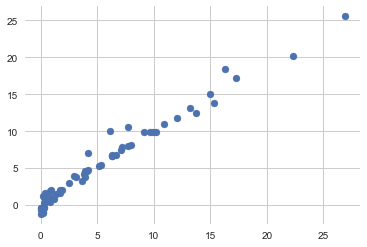

In [101]:
plt.scatter(y_test,y_pred)

# Ridge Regression CV

In [103]:
from sklearn.linear_model import RidgeCV

In [104]:
ridgecv=RidgeCV(cv=5)

In [106]:
ridgecv.fit(x_train_scaled, y_train)

RidgeCV(cv=5)

In [107]:
ridgecv.predict(x_test_scaled)

array([ 9.88378621,  8.1229411 ,  8.19696567,  6.88655618,  8.05826749,
       11.77410064, -1.01407308,  9.89029315,  5.43236109, 12.30150832,
        0.54273029, 13.06366053,  6.92798314, 15.01409854,  0.4676288 ,
        0.24683324,  1.85815262,  1.93923862,  3.65447169,  1.08217842,
       10.65580402,  5.43221292,  7.01187627, -0.92722156,  3.11583918,
        4.37164142,  9.8014707 , -0.23642597,  1.38888086,  1.68992454,
       13.88923425,  0.97974212, -0.45093839, 20.28673815,  4.53282402,
        0.99384659,  0.78369535, 18.31557627, 25.61187908,  2.07498163,
        6.71380826,  0.5681581 , -0.56762232,  1.51699271,  0.32314414,
       -0.23918907,  4.98513082,  7.32956169, -1.04479909,  9.97575455,
        4.57621445,  9.89798728, -0.2172625 ,  2.10662089,  6.64790891,
        1.35265817, 10.91724686,  4.04432568,  4.12479814, 17.15004738,
        3.16435498])

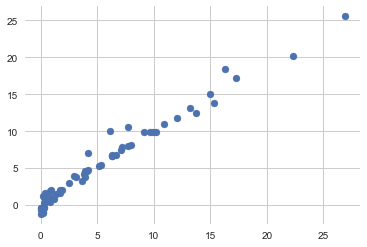

In [108]:
plt.scatter(y_test,y_pred)

In [109]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("mean squared error", mse)
print("r2 score: ", r2) 
print("mean absolute error:", mae)

mean squared error 1.0288768086037743
r2 score:  0.9703616658498144
mean absolute error: 0.6815210634135523


In [110]:
ridgecv.alpha_

1.0

In [111]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

# ElasticNetCV

In [112]:
from sklearn.linear_model import ElasticNetCV

In [116]:
enet=ElasticNetCV(cv=5)

In [117]:
enet.fit(x_train_scaled, y_train)
enet.predict(x_test_scaled)

array([ 9.89718125,  8.24744566,  8.27128942,  6.91536863,  8.09305395,
       11.72921726, -1.08535972,  9.90408172,  5.64343815, 12.34010512,
        0.81175363, 13.0780901 ,  7.09003099, 14.9610801 ,  0.60650206,
        0.14729179,  2.00220684,  2.20052514,  3.89903746,  0.84019158,
       10.7326759 ,  5.63764396,  6.97472465, -0.95988047,  3.27140514,
        4.51349135,  9.91505092, -0.23792141,  1.17923965,  1.60049703,
       13.78920935,  0.90984239, -0.56185832, 20.01166795,  4.65750673,
        1.11364076,  1.01553576, 18.25332284, 25.29814664,  2.23815299,
        6.8953967 ,  0.74971162, -0.88562655,  1.69288856,  0.49153669,
       -0.74668635,  5.09464472,  7.4186021 , -1.39607472, 10.0251805 ,
        4.70051839,  9.99844931, -0.48799602,  2.2903665 ,  6.77230811,
        1.54158542, 10.99135973,  4.2736732 ,  4.42425203, 17.05934997,
        3.42432055])

In [118]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("mean squared error", mse)
print("r2 score: ", r2) 
print("mean absolute error:", mae)

mean squared error 1.0288768086037743
r2 score:  0.9703616658498144
mean absolute error: 0.6815210634135523


In [119]:
enet.alpha_

0.04082736775482502

In [120]:
import pickle

In [ ]:
pickle.dump()